## Our First Neural Network - MNIST digits

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
mnist

<module 'tensorflow_core.keras.datasets.mnist' from '/Users/aschwinschilperoort/Github/handson-ml/venv/lib/python3.7/site-packages/tensorflow_core/python/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

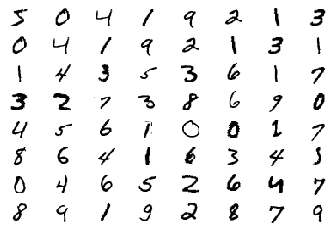

In [30]:
fig, ax = plt.subplots(nrows=8, ncols=8)
for i in range(8):
    for j in range(8):
        ax[i][j].imshow(x_train[i**3+j], cmap='binary')
        ax[i][j].axis("off")

In [33]:
x_train, x_test = x_train /255.0, x_test / 255.0

In [37]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [38]:
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.2929 - accuracy: 0.9145
Epoch 2/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.1481 - accuracy: 0.9567
Epoch 3/5
60000/60000 [==============================] - 2s 34us/sample - loss: 0.1103 - accuracy: 0.9663
Epoch 4/5
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0907 - accuracy: 0.9717
Epoch 5/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0769 - accuracy: 0.9756


In [39]:
model.evaluate(x_test, y_test, verbose=2)

10000/1 - 0s - loss: 0.0389 - accuracy: 0.9775


[0.07683638922064565, 0.9775]

In [43]:
y_pred = model.predict_classes(x_test)

In [76]:
combinations = list(zip(y_pred, y_test, x_test))
misses = [(pred, draw) for pred, real, draw in combinations if pred != real]

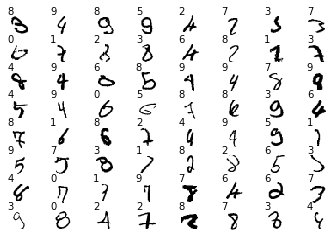

In [95]:
fig, ax = plt.subplots(nrows=8, ncols=8)
c = 0
for i in range(8):
    for j in range(8):
        pred, im = misses[c]
        c += 1
        ax[i][j].imshow(im, cmap='binary')
        ax[i][j].axis("off")
        ax[i][j].annotate(pred, (0,0))

Can you blame m?

## Our Second Neural Network - MNIST clothes

In [97]:
from tensorflow import keras
print(tf.__version__)

2.0.0


In [98]:
fashion_mnist = keras.datasets.fashion_mnist

In [99]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [108]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

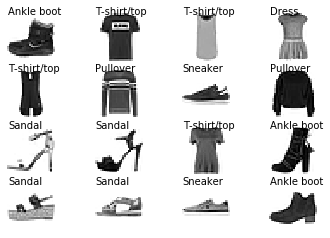

In [109]:
fig, ax = plt.subplots(nrows=4, ncols=4)
im = 0
for i in range(4):
    for j in range(4):
        ax[i][j].imshow(train_images[im], cmap='binary')
        ax[i][j].axis("off")
        ax[i][j].annotate(class_names[train_labels[im]], (0,0))
        im += 1

In [114]:
train_images, test_images = train_images/255.0, test_images/255.0

### Let's build the model again.

In [119]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [120]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 39us/sample - loss: 1.1244 - accuracy: 0.6382
Epoch 2/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.6795 - accuracy: 0.7523
Epoch 3/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.5990 - accuracy: 0.7817
Epoch 4/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.5557 - accuracy: 0.8012
Epoch 5/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.5204 - accuracy: 0.8141
Epoch 6/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.4968 - accuracy: 0.8231
Epoch 7/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.4774 - accuracy: 0.8296
Epoch 8/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.4625 - accuracy: 0.8344
Epoch 9/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.4510 - accuracy: 0.8388s - loss: 0.450

In [121]:
model.evaluate(test_images, test_labels, verbose=2)

10000/1 - 0s - loss: 0.3521 - accuracy: 0.8356


[0.44736991996765135, 0.8356]

In [123]:
y_pred = model.predict_classes(test_images)

In [125]:
combinations = list(zip(test_labels, y_pred, test_images))
misses = [(prediction, image) for real, prediction, image in combinations if real != prediction]

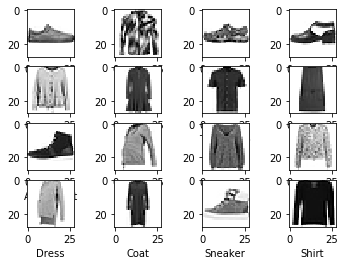

In [130]:
m = 0
fig, ax = plt.subplots(nrows=4, ncols=4)
for i in range(4):
    for j in range(4):
        ax[i][j].imshow(misses[m][1], cmap='binary')
#         ax[i][j].axis("off")
        ax[i][j].set_xlabel(class_names[misses[m][0]])
        m += 1

## Our third model - Regression on Miles per Gallon

In [1]:
import pathlib
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [2]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/Users/aschwinschilperoort/.keras/datasets/auto-mpg.data'

In [3]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [4]:
def preprocess_data(df: pd.DataFrame):
    return (df
            .dropna()
            .assign(USA=lambda d: np.where(d['Origin'] == 1, 1, 0))
            .assign(Europe=lambda d: np.where(d['Origin'] == 2, 1, 0))
            .assign(Japan=lambda d: np.where(d['Origin'] == 3, 1, 0))
            .drop("Origin", axis = 1)
           )

df = dataset.pipe(preprocess_data)

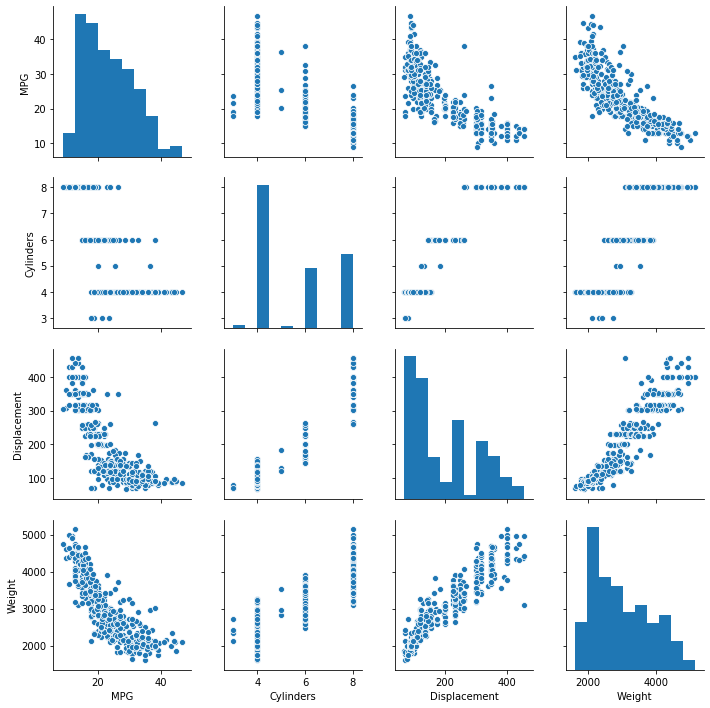

In [5]:
sns.pairplot(df[["MPG", "Cylinders", "Displacement", "Weight"]]);

In [6]:
sc = StandardScaler()

X = df.copy()
y = X.pop("MPG")
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state=42)

In [7]:
X_train.shape

(274, 9)

In [8]:
y_train.values

array([22. , 21. , 37. , 21. , 15. , 31. , 23. , 24.5, 29. , 30.5, 15. ,
       34.7, 27. , 28. , 19. , 41.5, 17.5, 29. , 26. , 31.8, 18. , 16.5,
       13. , 19. , 30. , 20. , 19. , 27. , 23. , 14. , 20.6, 27.9, 15. ,
       32. , 12. , 23. , 33.5, 25.5, 40.8, 16.5, 32.3, 44.3, 12. , 32.8,
       24. , 18.1, 14. , 13. , 11. , 18. , 32. , 27.2, 16. , 17.5, 12. ,
       26. , 14. , 28. , 20. , 13. , 27.2, 29. , 19.1, 28. , 27. , 19. ,
       26. , 15.5, 13. , 38. , 18. , 23.7, 24.5, 34. , 23. , 26. , 33. ,
       29.5, 15. , 24. , 32. , 14. , 14. , 39.1, 17.5, 17. , 21. , 33. ,
       25.8, 20.3, 24. , 20.2, 23.9, 34. , 20.2, 28.1, 13. , 39.4, 14. ,
       16. , 18.5, 20. , 32. , 18. , 26.5, 16. , 16. , 29. , 10. , 15. ,
       46.6, 20.5, 37. , 17.7, 44.6, 23.5, 31. , 14. , 29.8, 27. , 27. ,
       43.4, 20. , 36. , 20.2, 18. , 27. , 17.6, 18. , 38. , 17. , 18.5,
       14. , 43.1, 16. , 19. , 16. , 15. , 19. ,  9. , 25. , 31. , 26.4,
       27.2, 15.5, 13. , 30. , 21.5, 34.1, 23.9, 25

In [9]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

In [23]:
model = build_model()

In [24]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = model.fit(
    X_train, y_train.values,
    epochs=100,
    validation_split=0.2,
    verbose=0
)

In [19]:
X_test[1]

array([-0.86401356, -0.70243687,  0.27393484, -0.21523071,  0.05758756,
        0.54916798, -1.29099445,  2.18282063, -0.50239045])

In [20]:
model.predict(X_test[:2])

array([[26.113527],
       [20.073027]], dtype=float32)

In [21]:
y_test[:2]

79     26.0
276    21.6
Name: MPG, dtype: float64

In [25]:
hist = pd.DataFrame(history.history)

In [22]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()
    
    plt.xlabel('Epoch')
    plt.ylabel('Mean abs error [MPG]')
    
    plt.plot(hist['epoch'], hist['mae'], label='train error')
    plt.plot(hist['epoch'], hist['val_mae'], label ='Val error')
    plt.ylim([0, 5])
    plt.legend()
    
    plt.figure()
    
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [MPG]')
    plt.plot(hist['epoch'], hist['mse'], label = 'Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.ylim([0, 20])
    plt.legend()
    plt.show()
    
    

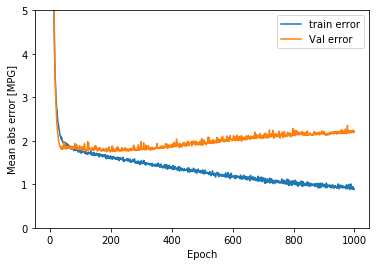

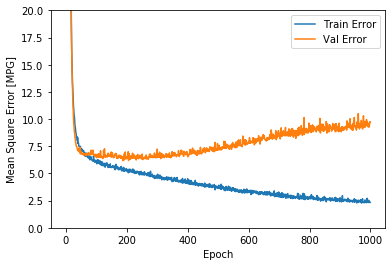

In [37]:
plot_history(history)

Train on 219 samples, validate on 55 samples
Epoch 1/400
219/219 [==============================] - 1s 2ms/sample - loss: 589.8265 - mae: 22.9251 - mse: 589.8265 - val_loss: 673.3941 - val_mae: 24.7624 - val_mse: 673.3941
Epoch 2/400
219/219 [==============================] - 0s 77us/sample - loss: 550.6785 - mae: 22.0503 - mse: 550.6785 - val_loss: 635.4787 - val_mae: 23.9936 - val_mse: 635.4787
Epoch 3/400
219/219 [==============================] - 0s 82us/sample - loss: 514.8034 - mae: 21.2349 - mse: 514.8034 - val_loss: 593.8607 - val_mae: 23.1319 - val_mse: 593.8607
Epoch 4/400
219/219 [==============================] - 0s 82us/sample - loss: 475.7755 - mae: 20.3282 - mse: 475.7755 - val_loss: 548.4814 - val_mae: 22.1561 - val_mse: 548.4814
Epoch 5/400
219/219 [==============================] - 0s 81us/sample - loss: 432.5713 - mae: 19.2827 - mse: 432.5713 - val_loss: 496.6906 - val_mae: 21.0052 - val_mse: 496.6906
Epoch 6/400
219/219 [==============================] - 0s 87us/sam

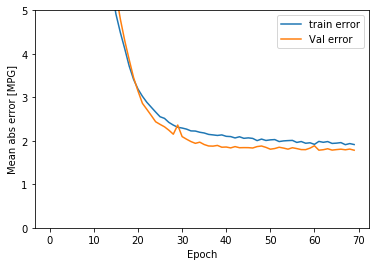

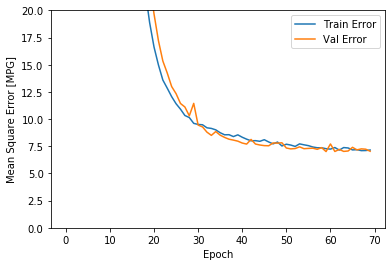

In [27]:
# The patience parameter is the amount of epochs to check for improvement
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train.values,
                    epochs = 400,
                    validation_split = 0.2, verbose=1, 
                    callbacks=[early_stop])

plot_history(history)

In [28]:
loss, mae, mse = model.evaluate(X_test, y_test.values, verbose = 2)

118/1 - 0s - loss: 9.2809 - mae: 2.0004 - mse: 7.9057


In [30]:
y_pred = model.predict(X_test)

(8.290143369175626, 45.70985663082437, 9.678200465217067, 47.09791372686581)

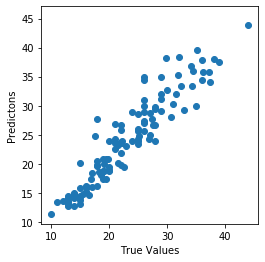

In [32]:
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictons")
plt.axis('equal')
plt.axis('square')